In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_excel('Excel Project Dataset.xlsx')


In [7]:
df.Gender[df['Gender'] =='F'] = 'Female'

C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\2829346946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df['Gender'] =='F'] = 'Female'


In [8]:
df.Gender[df['Gender']=='M'] ='Male'

C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\3975733658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df['Gender']=='M'] ='Male'


In [11]:
df.columns = df.columns.str.lower()

In [16]:
df.rename(columns={'marital status':'status','commute distance':'distance','purchased bike':'purchased_bike'},inplace=True)

In [18]:
df.status[df['status']=='M'] = 'Male'

C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\3911958613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.status[df['status']=='M'] = 'Male'


In [21]:
df.status[df['status']=='S'] = 'Single'

C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\1459000355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.status[df['status']=='S'] = 'Single'


In [26]:
conditions = (df['age'] <=32),(df['age'] >=54)
choices = ['Adolescent','Old']
df['age_bracket'] = np.select(conditions,choices,default='Middle Age')

In [28]:
df.drop('age',axis=1,inplace=True)

In [31]:
df['distance'].unique()

array(['0-1 Miles', '2-5 Miles', '5-10 Miles', '1-2 Miles', '10+ Miles'],
      dtype=object)

In [37]:
df['distance'] = df['distance'].str.replace('10+ Miles','10 Miles and more')

C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\1668170891.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['distance'] = df['distance'].str.replace('10+ Miles','10 Miles and more')


In [41]:
df['distance'].unique()

array(['0-1 Miles', '2-5 Miles', '5-10 Miles', '1-2 Miles', '10+ Miles'],
      dtype=object)

In [40]:
df.distance[df['distance'] == '5-10 Miles and more' ] = '5-10 Miles'

C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\4134175229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.distance[df['distance'] == '5-10 Miles and more' ] = '5-10 Miles'


In [42]:
df.distance[df['distance'] =='10+ Miles' ] = '10 Miles and More'

C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\2799839399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.distance[df['distance'] =='10+ Miles' ] = '10 Miles and More'


In [43]:
df['distance'].unique()

array(['0-1 Miles', '2-5 Miles', '5-10 Miles', '1-2 Miles',
       '10 Miles and More'], dtype=object)

In [47]:
df.sort_values(by='id',inplace=True)

In [78]:
df.tail(2)

,id,status,gender,income,children,education,occupation,home owner,cars,distance,region,purchased_bike,age_bracket
337,29424,Male,Male,10000,0,Partial High School,Manual,Yes,2,0-1 Miles,Europe,No,Adolescent
435,29447,Single,Female,10000,2,Bachelors,Clerical,No,1,2-5 Miles,Europe,No,Old


# Visualizing

In [83]:
#Matplotlib

d = df.tail(100)

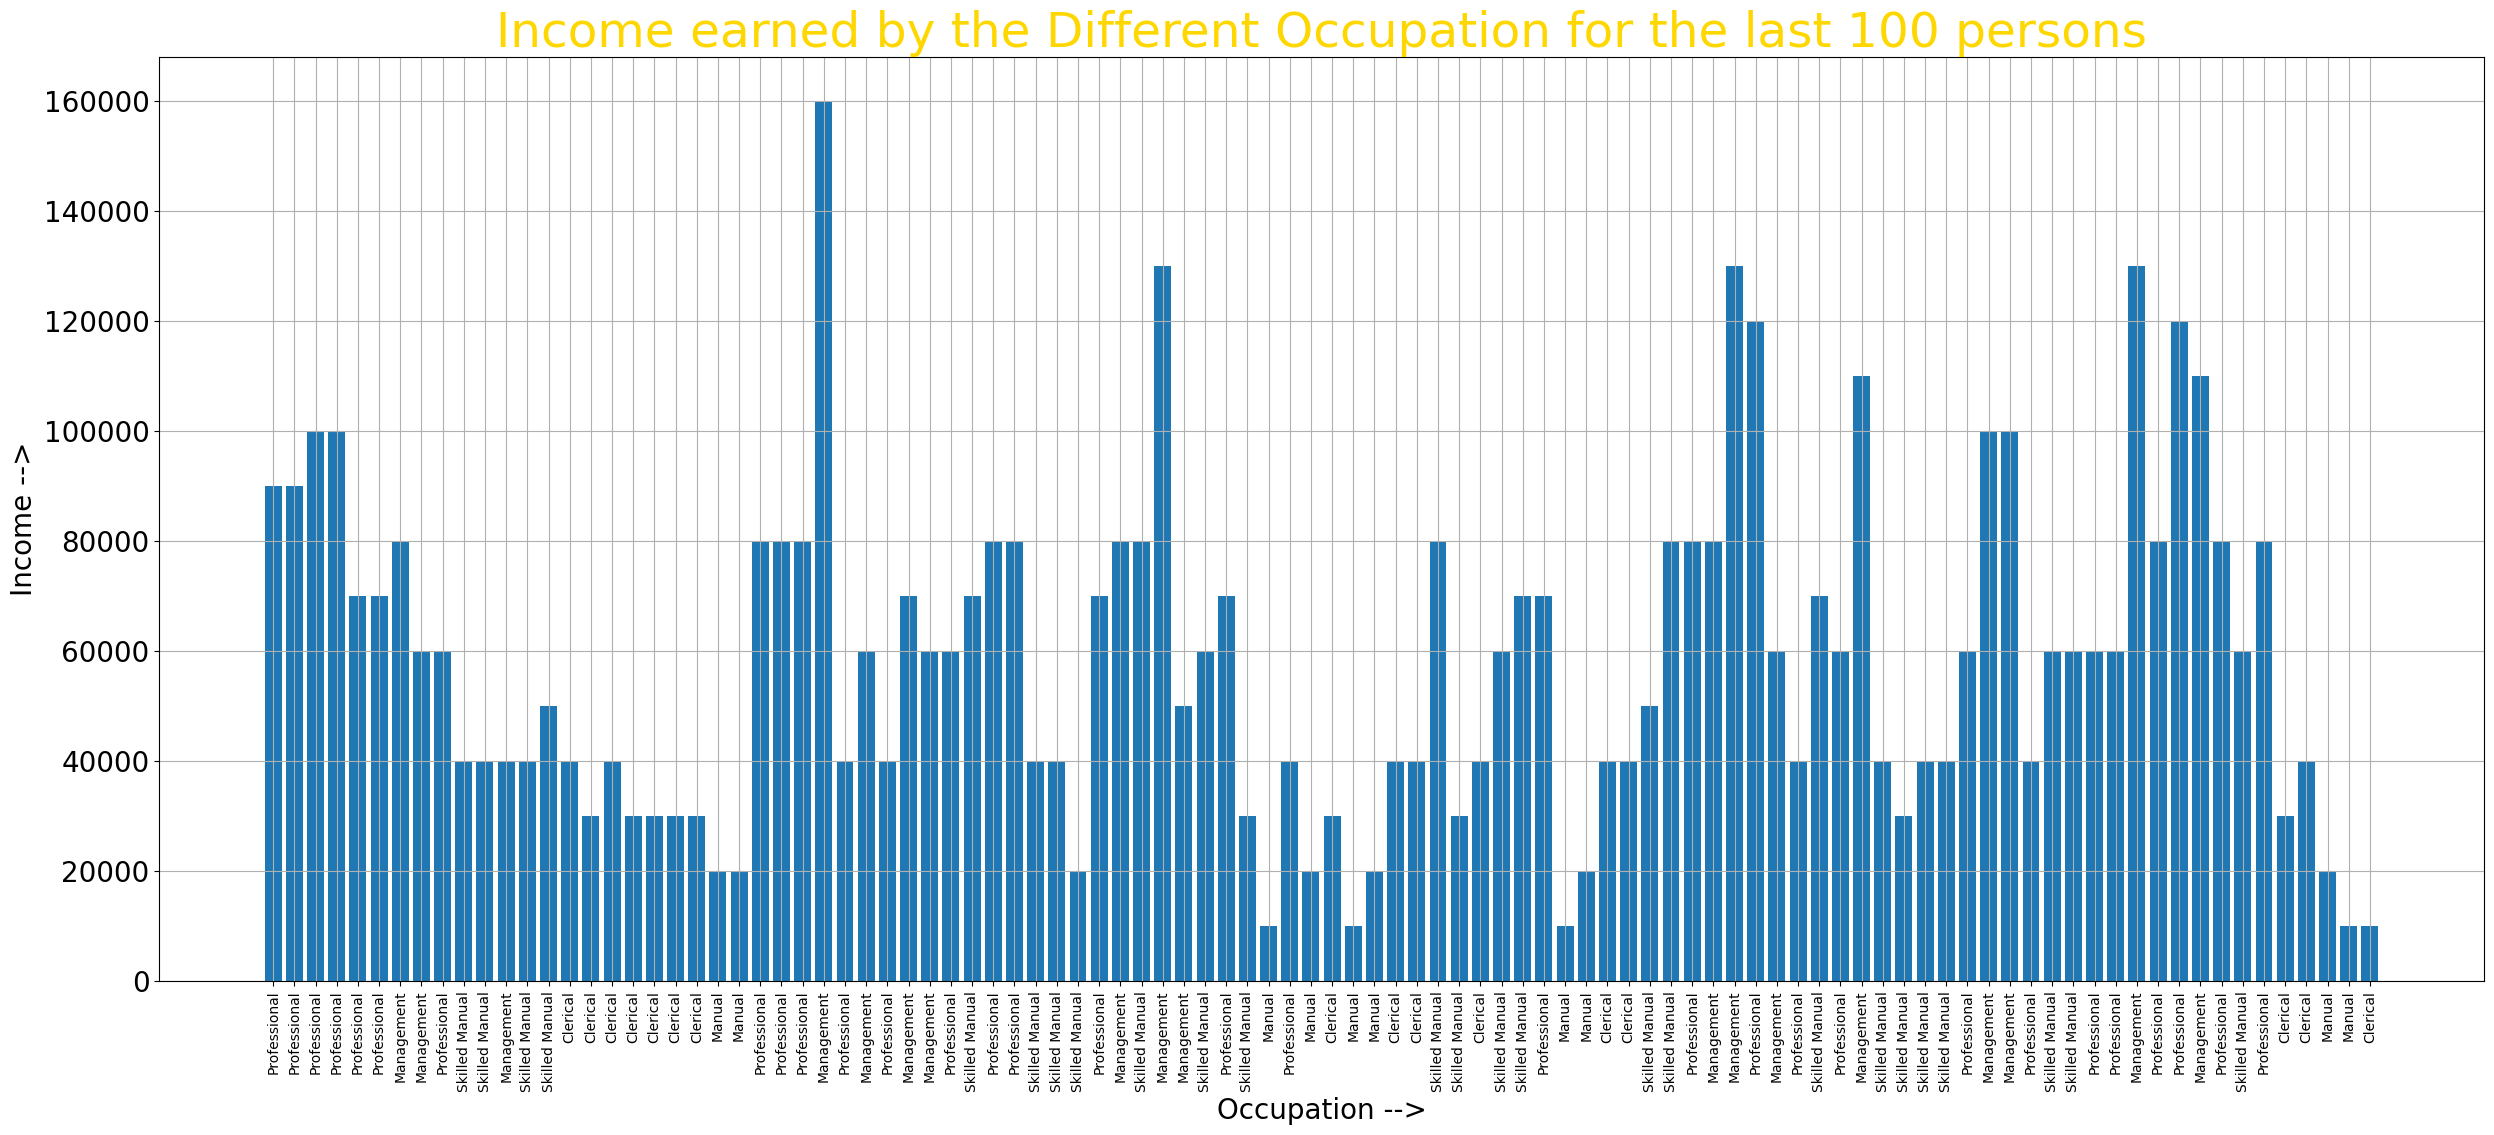

In [99]:
plt.figure(figsize=(30,12))
plt.bar(range(0,len(d['income'])),d['income'])
plt.yticks(fontsize=20)
plt.xticks(range(0,len(d['income'])),d['occupation'],rotation=90,fontsize=10)
plt.title('Income earned by the Different Occupation for the last 100 persons',color='Gold',fontsize=35)
plt.xlabel('Occupation -->',fontsize =20)
plt.ylabel('Income -->',fontsize=20)
plt.grid()
plt.show()

In [104]:
f = d.corr()


In [105]:
f.drop('id',inplace=True)

In [107]:
f.drop('id',axis=1,inplace=True)

<AxesSubplot:title={'center':'Correlation Between Income, Children, Cars'}>

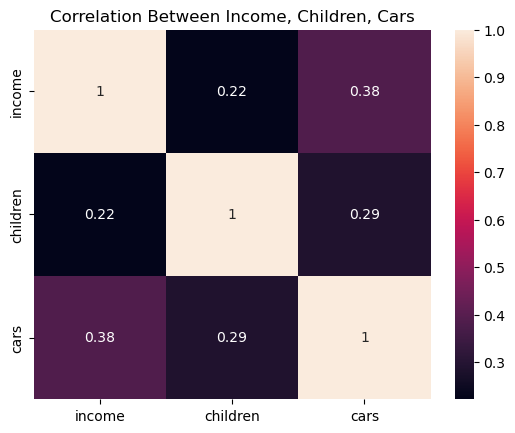

In [117]:
plt.title('Correlation Between Income, Children, Cars')
sns.heatmap(f,annot=True)

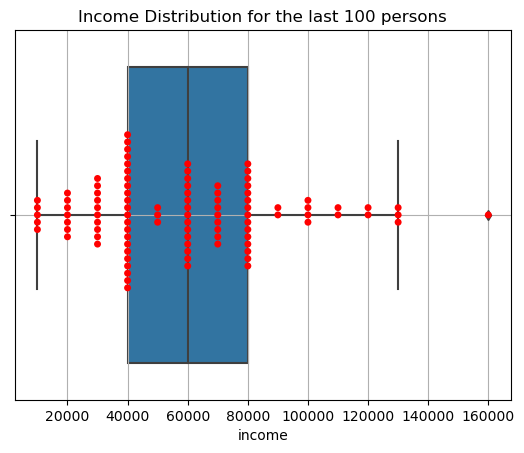

In [116]:
plt.title('Income Distribution for the last 100 persons')
sns.boxplot(x=d['income'])
sns.swarmplot(x=d['income'],color='red')
plt.grid()

<AxesSubplot:title={'center':'Income Distribution for the last 100 persons'}, xlabel='income'>

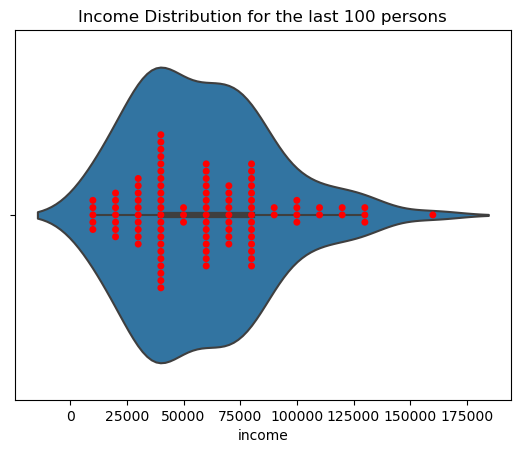

In [134]:
plt.title('Income Distribution for the last 100 persons')
sns.violinplot(x='income',data=d)
sns.swarmplot(x='income',data=d,color='red')

<AxesSubplot:title={'center':'Income by Occupation For the last 100 Persons'}, xlabel='occupation', ylabel='income'>

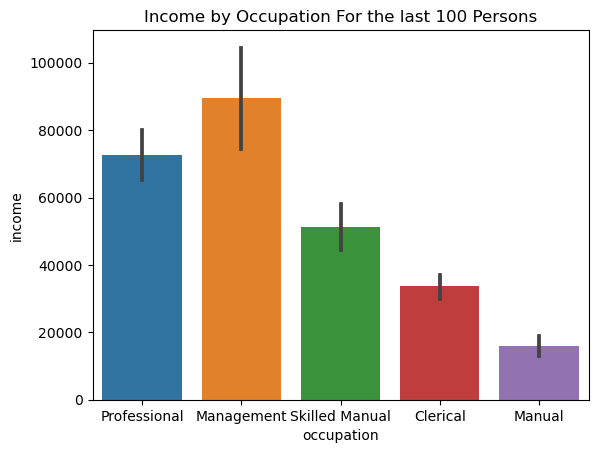

In [126]:
plt.title('Income by Occupation For the last 100 Persons')
sns.barplot(x='occupation',y='income',data=d)

In [145]:
d['age_bracket'].value_counts()

Middle Age    61
Old           20
Adolescent    19
Name: age_bracket, dtype: int64

<AxesSubplot:title={'center':'Distribution by Age Intervals (Adolescent,Middle Age, Old)'}, xlabel='age_bracket', ylabel='Count'>

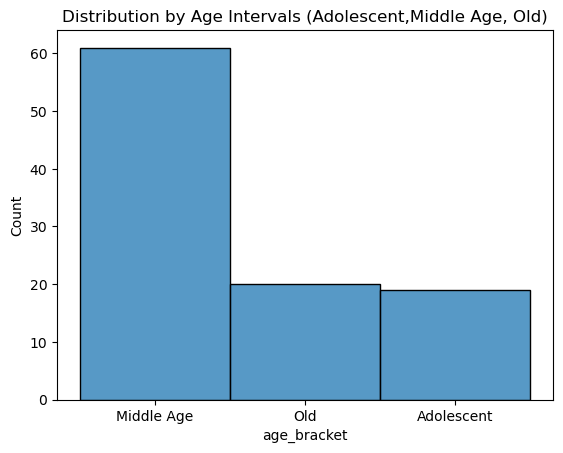

In [137]:
plt.title('Distribution by Age Intervals (Adolescent,Middle Age, Old)')
sns.histplot(x='age_bracket',data=d)

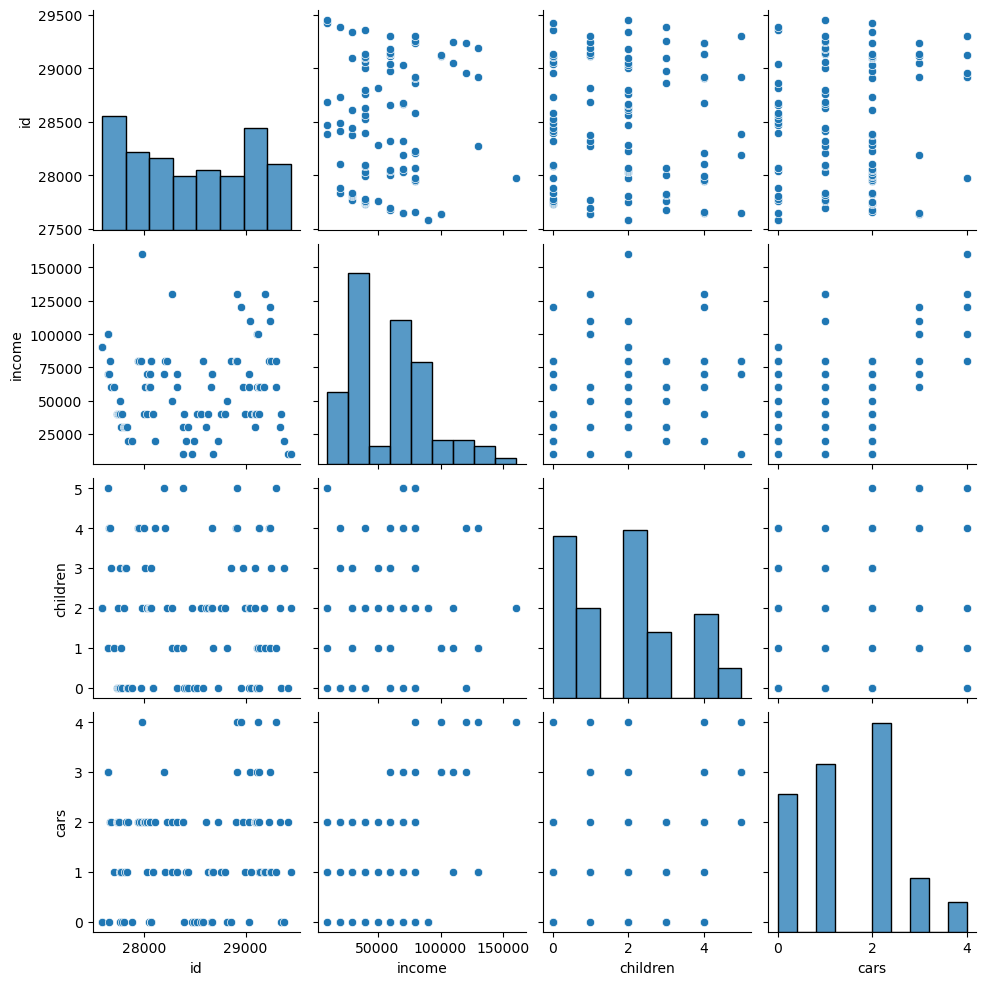

In [120]:
#Relationship Betwwen the Data
sns.pairplot(d)